# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd C:\Users\purvi\OneDrive\Documents\Projects by me\OASIS projects\Email spam classifier

C:\Users\purvi\OneDrive\Documents\Projects by me\OASIS projects\Email spam classifier


In [3]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [4]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1886,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...,NaN,NaN,NaN
1687,spam,Free Top ringtone -sub to weekly ringtone-get ...,NaN,NaN,NaN
1477,ham,Why you keeping me away like this,NaN,NaN,NaN
3301,ham,Stop calling everyone saying I might have canc...,NaN,NaN,NaN
3976,spam,Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...,NaN,NaN,NaN


In [6]:
# Drop the unnamed columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Rename columns for convenience
df.rename(columns={'v1':'Target','v2':'EmailText'},inplace=True)

In [9]:
df.shape

(5572, 2)

In [10]:
df.sample(5)

,Target,EmailText
3732,ham,Old Orchard near univ. How about you?
112,ham,I'm ok wif it cos i like 2 try new things. But...
2359,spam,Spook up your mob with a Halloween collection ...
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...
801,ham,Appt is at &lt;TIME&gt; am. Not my fault u don...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['Target'] = encoder.fit_transform(df['Target'])

In [13]:
df.head()

,Target,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#checking info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Target     5572 non-null   int32 
 1   EmailText  5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [15]:
df.isnull().sum()

Target       0
EmailText    0
dtype: int64

In [16]:
df.describe()

,Target
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [17]:
df.dtypes

Target        int32
EmailText    object
dtype: object

In [18]:
df.duplicated().sum()

403

In [19]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

# EDA

In [22]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

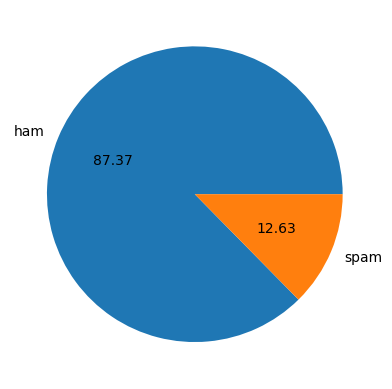

In [23]:
plt.pie(df['Target'].value_counts(),labels=['ham' , 'spam'],autopct='%0.2f')
plt.show()

## Data  is imbalanced

In [24]:
import nltk

In [25]:
!pip install nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\purvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['EmailText'].apply(len)

In [28]:
df.head()

,Target,EmailText,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# words
df['EmailText'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: EmailText, Length: 5169, dtype: object

In [30]:
 #num of words
df['num_words'] = df['EmailText'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,Target,EmailText,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['EmailText'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,Target,EmailText,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## Visualisation

<Axes: xlabel='num_characters', ylabel='Count'>

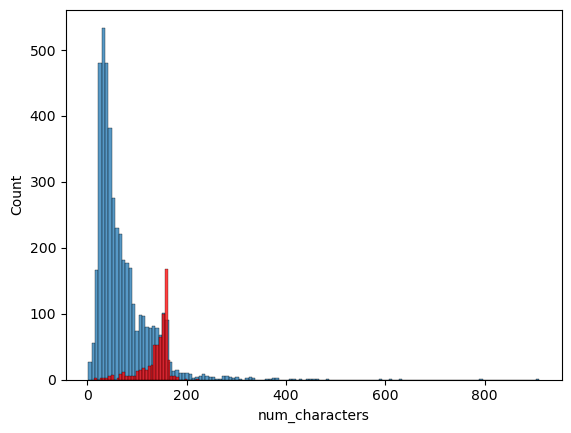

In [91]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

Insights:

This histogram shows the distribution of the number of characters in emails, with non-spam emails (blue) generally having fewer characters than spam emails (red). Spam emails exhibit a noticeable peak around 150-200 characters, indicating a common length for spam content.

<Axes: xlabel='num_words', ylabel='Count'>

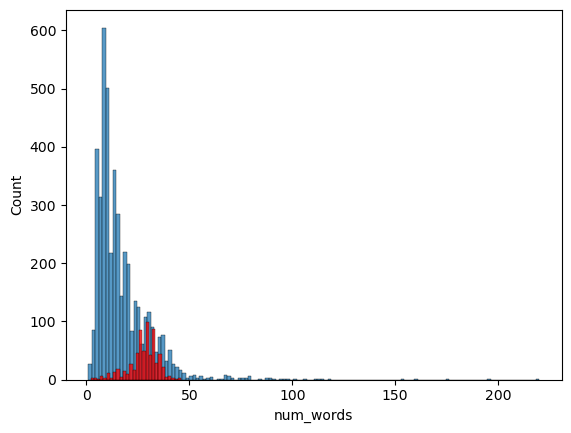

In [38]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

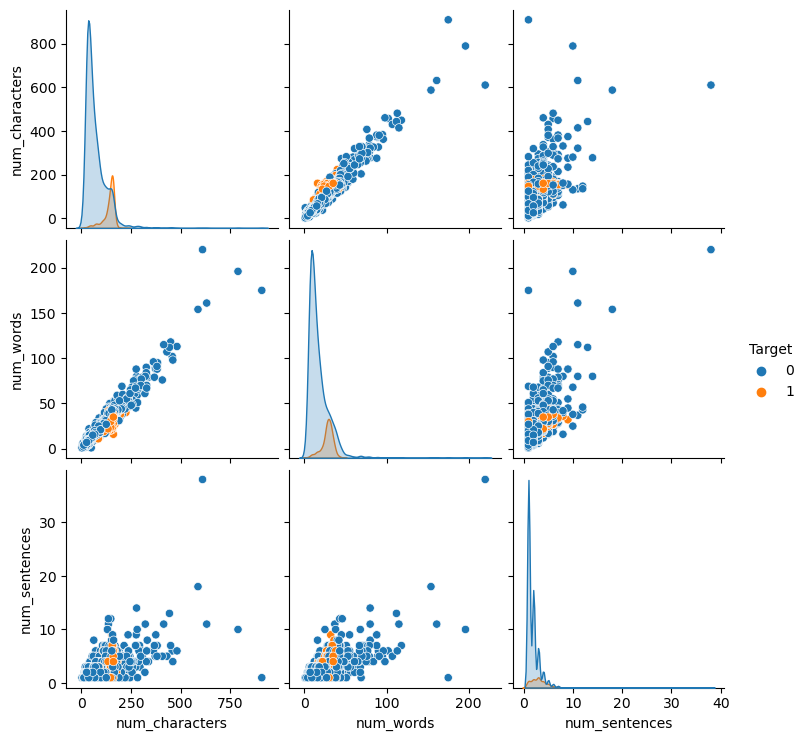

In [90]:
sns.pairplot(df,hue='Target')

Insights:
    
This pair plot visualizes the relationships between the number of characters, words, and sentences in emails, distinguishing between spam (orange) and non-spam (blue) emails. It shows a strong positive correlation between the number of characters and words across both classes. Spam emails tend to cluster with slightly higher values in all three features, suggesting that they are generally longer and more verbose than non-spam emails. The distributions of these features also highlight that most emails, regardless of class, have lower counts, with a few outliers exhibiting significantly higher values.

In [40]:
# Select only the numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include='number')

In [41]:
# Compute the correlation matrix
corr = numeric_df.corr()

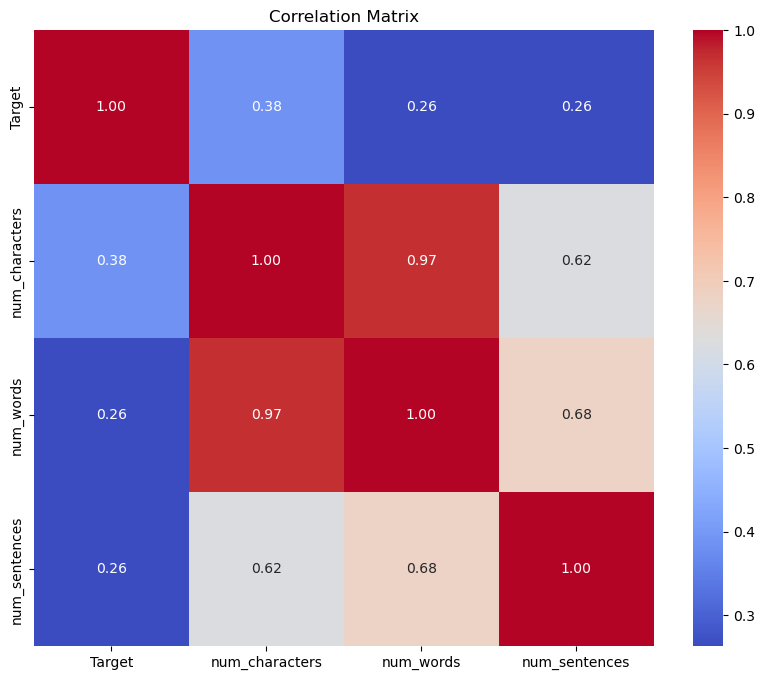

In [88]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Insights:

The correlation matrix shows a moderate positive correlation between the target variable and the number of characters (0.38), suggesting longer messages might be more likely classified as spam. There is a strong positive correlation between the number of characters and the number of words (0.97), indicating that longer messages in terms of character count also contain more words. Additionally, the number of sentences has a moderate correlation with both the number of words (0.68) and the number of characters (0.62), reflecting that longer messages tend to have more sentences.

##  Data Preprocessing

Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [43]:
def transform_text(EmailText):
    text = EmailText.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [44]:
#STOP WORDS
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
#PUNCTUATIONS
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
df['EmailText'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [47]:
#STEMMIMG
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [48]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [49]:
df['EmailText'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [50]:
transform_text('Hi how Are you %% EG' )

'hi eg'

In [51]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [52]:
df['transformed_text'] = df['EmailText'].apply(transform_text)

In [53]:
df.head()

,Target,EmailText,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=800,min_font_size=10,background_color='white')

In [55]:
#Wordcloud for Spam messages
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

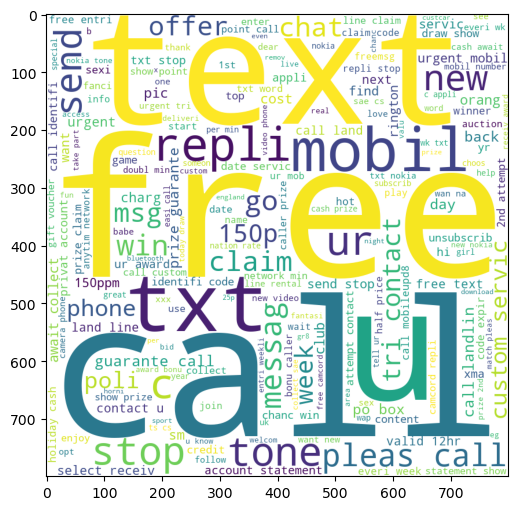

In [56]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [57]:
#Wordcloud for Ham messages
ham_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

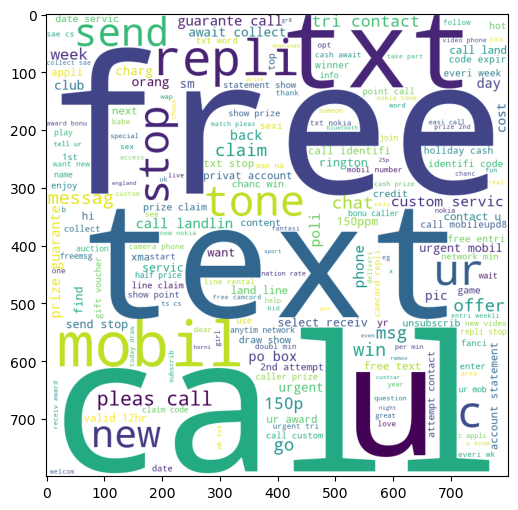

In [58]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [59]:
df.head()

,Target,EmailText,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

9939

In [62]:
from collections import Counter
# Create a Counter object from the spam_corpus list
counter = Counter(spam_corpus)

In [63]:
# Get the 30 most common elements and their counts
most_common = counter.most_common(30)

In [64]:
# Convert the most common elements to a DataFrame
df_most_common = pd.DataFrame(most_common, columns=['word', 'count'])

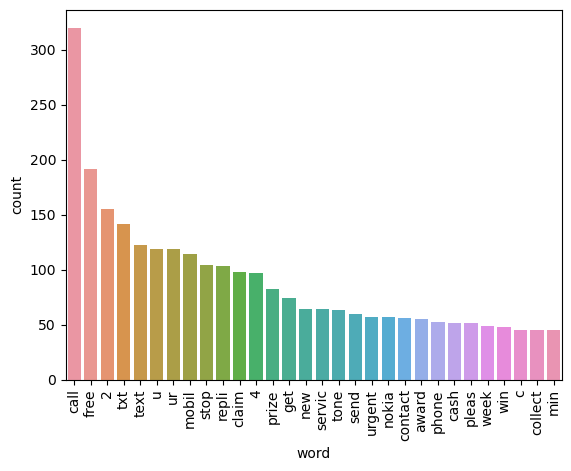

In [65]:
# Create the bar plot using Seaborn
sns.barplot(x='word', y='count', data=df_most_common)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

insights:

High Frequency Terms: "Call" and "free" are the top words, highlighting their importance in spam detection.

Promotional Language: Words like "prize," "win," and "cash" indicate many spam emails offer rewards.

Service-Related Words: Terms such as "mobil" and "servic" suggest spam often targets mobile services.

Urgency and Action: Words like "urgent" and "stop" reflect the urgency spam emails try to convey.

Brand Names: Inclusion of names like "nokia" implies some spam emails reference well-known brands.

In [66]:
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [67]:
len(ham_corpus)

35404

In [68]:
# Create a Counter object from the ham_corpus list
counter = Counter(ham_corpus)

In [69]:
# Get the 30 most common elements and their counts
most_common = counter.most_common(30)

In [70]:
# Convert the most common elements to a DataFrame
df_most_common = pd.DataFrame(most_common, columns=['word', 'count'])

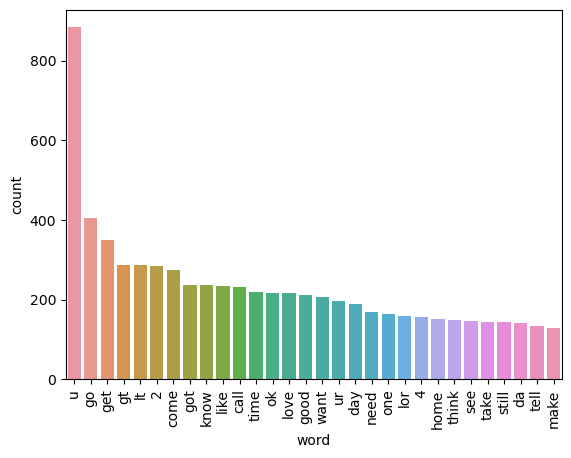

In [87]:
# Create the bar plot using Seaborn
sns.barplot(x='word', y='count', data=df_most_common)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

insights:

The visualization highlights the most frequent words in a dataset, with "u" and "go" being the most common, indicating informal language or commands are prevalent. Other frequent words like "get," "come," and "know" suggest action-oriented content, while terms like "love," "good," and "want" imply personal or positive messages. This suggests the dataset may include conversational or directive language, often found in informal communications.

In [72]:
# Text Vectorization
# using Bag of Words
df.head()

,Target,EmailText,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Building

In [73]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [74]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [75]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
X.shape

(5169, 6708)

In [77]:
y = df['Target'].values

In [78]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 2)

In [80]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [81]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [82]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

In [92]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


Insights : 
The Naive Bayes classifier achieved an accuracy of 87.62%, with a precision of 52.31%, indicating a moderate ability to correctly identify spam. The confusion matrix reveals 103 false positives and 25 false negatives, suggesting the model is more likely to incorrectly classify legitimate emails as spam than to miss actual spam.

In [93]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


Insights:
The Multinomial Naive Bayes classifier achieved a high accuracy of 95.94% and a perfect precision score of 100%, indicating it correctly identified all predicted spam emails. The confusion matrix shows no false positives, but 42 false negatives, suggesting the model effectively avoids misclassifying legitimate emails as spam, though it may miss some actual spam.

In [85]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Insights:

The Bernoulli Naive Bayes classifier achieved a high accuracy of 97.00% and a precision score of 97.35%, indicating a strong performance in correctly identifying spam emails. The confusion matrix shows only 3 false positives and 28 false negatives, suggesting the model is highly effective in correctly classifying both spam and legitimate emails, with minimal misclassification.

In [95]:
# tfidf --> Mnb

## Project Review:

Comparison of Naive Bayes Models for Email Spam Classification
In this project, three different Naive Bayes classifiers—Gaussian Naive Bayes (GNB), Multinomial Naive Bayes (MNB), and Bernoulli Naive Bayes (BNB)—were evaluated for their performance in classifying email spam. The results of each model are compared based on accuracy, precision, and confusion matrices to determine their effectiveness.


Gaussian Naive Bayes (GNB)

Accuracy: 87.62%
Precision: 52.31%

Confusion Matrix:

True Positives (TP): 113
True Negatives (TN): 793
False Positives (FP): 103
False Negatives (FN): 25

The GNB model showed moderate accuracy and precision, with a notable number of false positives. This suggests that while it can identify spam reasonably well, it tends to misclassify legitimate emails as spam.


Multinomial Naive Bayes (MNB)

Accuracy: 95.94%
Precision: 100%

Confusion Matrix:

True Positives (TP): 96
True Negatives (TN): 896
False Positives (FP): 0
False Negatives (FN): 42

The MNB model demonstrated high accuracy and perfect precision, indicating it identified all predicted spam emails correctly. However, it had a relatively higher number of false negatives, meaning some spam emails were not detected.


Bernoulli Naive Bayes (BNB)

Accuracy: 97.00%
Precision: 97.35%

Confusion Matrix:

True Positives (TP): 110
True Negatives (TN): 893
False Positives (FP): 3
False Negatives (FN): 28

The BNB model achieved the highest accuracy and excellent precision, effectively balancing the detection of spam and legitimate emails. It had the fewest false positives, making it highly reliable for minimizing incorrect spam classifications.


Comparative Analysis
Accuracy: BNB > MNB > GNB


The Bernoulli Naive Bayes model showed the highest accuracy, closely followed by the Multinomial Naive Bayes model. The Gaussian Naive Bayes model lagged behind in accuracy.
Precision: MNB > BNB > GNB


Multinomial Naive Bayes achieved perfect precision, followed by Bernoulli Naive Bayes with very high precision. Gaussian Naive Bayes had the lowest precision, indicating more false positives.
False Positives and Negatives:


The MNB model had no false positives, making it highly reliable in avoiding misclassification of legitimate emails as spam. However, it had the highest number of false negatives.
The BNB model maintained a balance with very few false positives and a moderate number of false negatives, making it the most balanced in performance.
The GNB model had a higher number of false positives, which could be problematic in real-world applications where misclassifying legitimate emails as spam is costly.

## Conclusion

Among the three models, the Bernoulli Naive Bayes classifier emerged as the most effective, offering the best balance between high accuracy and precision while minimizing false positives. The Multinomial Naive Bayes model is also highly accurate and completely avoids false positives but at the cost of missing some spam emails. The Gaussian Naive Bayes model, while moderately effective, showed a tendency to misclassify legitimate emails as spam, making it less suitable for scenarios where precision is critical. Overall, the BNB model is recommended for its robustness and balanced performance in spam email classification.